In [1]:
from statistics import mean

In [8]:
#Data Analysis Libraries
import pandas as pd
import numpy as np
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot, boxcox
from scipy.special import inv_boxcox
#Data Preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold
#Importing Models
from sklearn.linear_model import LinearRegression,Lasso,Ridge,BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error

In [9]:
df=pd.read_csv("C:\\Users\\CHETANA\\OneDrive\\Desktop\\data analytics\\mini_project\\House_Rent_Dataset.csv")

In [10]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [11]:
df.shape

(4746, 12)

In [12]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [15]:
#Checking the Mean of the Rent
print('The Mean of the Rent is {}'.format(df['Rent'].mean()))
print('The Standard Deviation of Rent is {}'.format(df['Rent'].std()))

The Mean of the Rent is 34993.45132743363
The Standard Deviation of Rent is 78106.41293734881


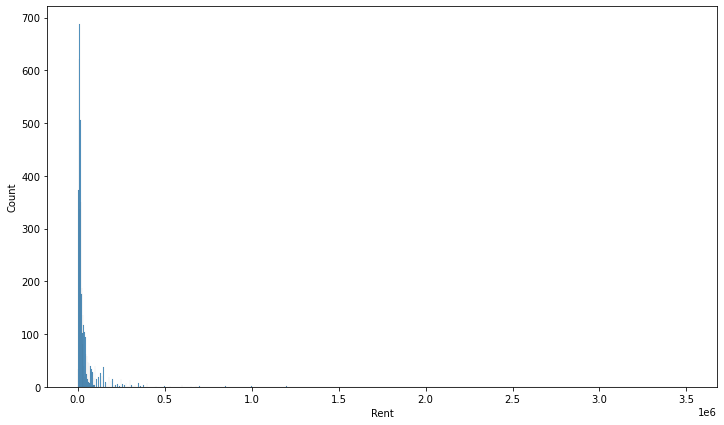

In [19]:
#Analyzing the Rent
plt.figure(figsize=(12,7))
sns.histplot(df.Rent)
plt.show()

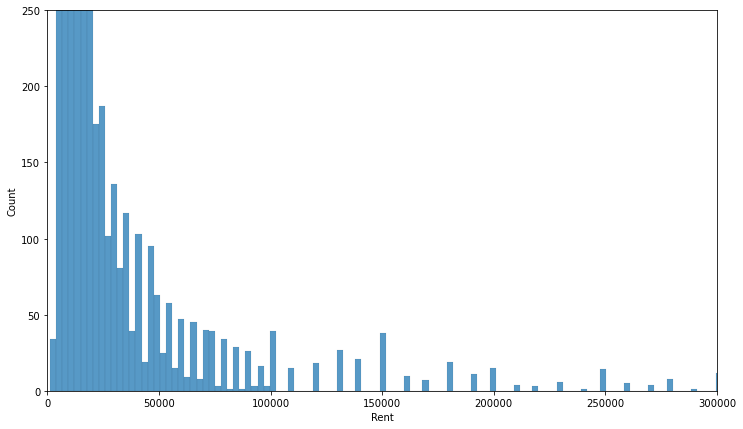

In [21]:
plt.figure(figsize=(12,7))
sns.histplot(df.Rent)
plt.xlim(0,300000)
plt.ylim(0,250)
plt.show()

C:\Users\CHETANA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


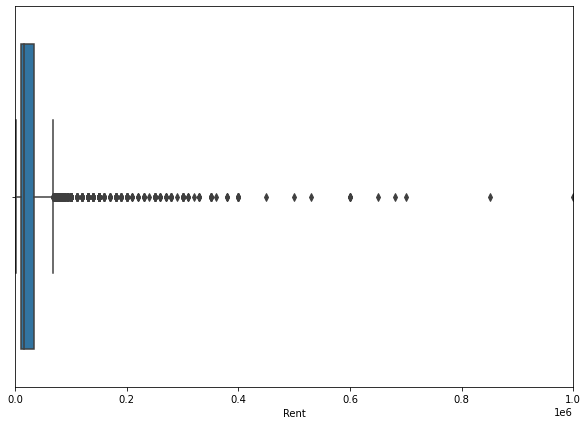

In [25]:
plt.figure(figsize=(10,7))
sns.boxplot(df.Rent)
plt.xlim(0,1000000)
plt.show()

In [26]:
#We will apply Log Transformation in order to convert Rent into Normal Distribution
df['Rent']=np.log1p(df['Rent'])

C:\Users\CHETANA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rent'>

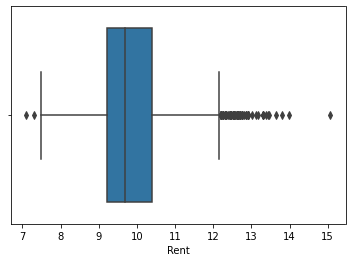

In [27]:
sns.boxplot('Rent',data=df)

In [28]:
#Analyzing the Posted On column
df['Posted On'].nunique()

81

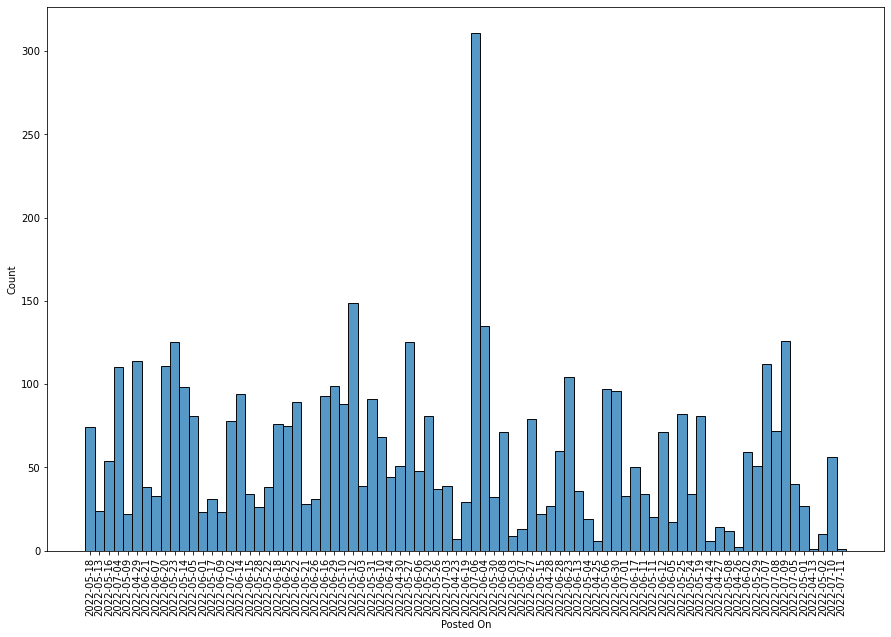

In [29]:
plt.figure(figsize=(15,10))
sns.histplot(df['Posted On'])
plt.xticks(rotation='vertical')
plt.show()

In [30]:
#Analyzing the BHK column
df.BHK.unique()

array([2, 1, 3, 6, 4, 5], dtype=int64)

C:\Users\CHETANA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BHK', ylabel='count'>

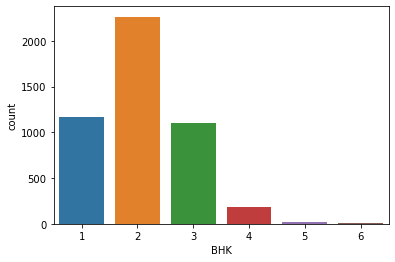

In [34]:
sns.countplot('BHK',data=df)

<AxesSubplot:xlabel='BHK', ylabel='Rent'>

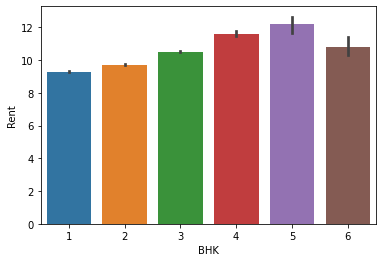

In [37]:
sns.barplot(x='BHK',y='Rent',data=df)

In [40]:
### observation:The Average Rent of the 5BHK is the highest compared to all.###

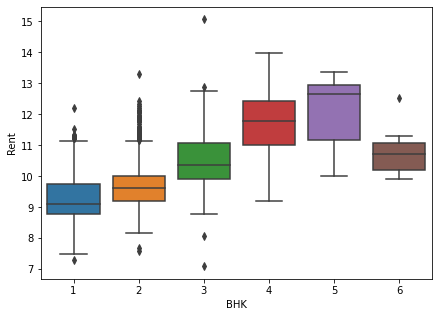

In [36]:
plt.figure(figsize=(7,5))
sns.boxplot(x='BHK',y='Rent',data=df)
plt.show()

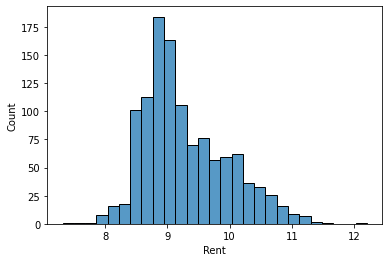

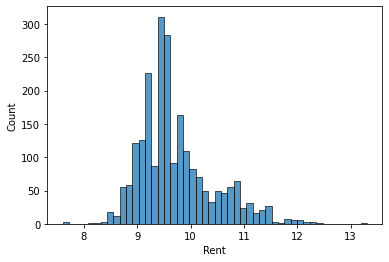

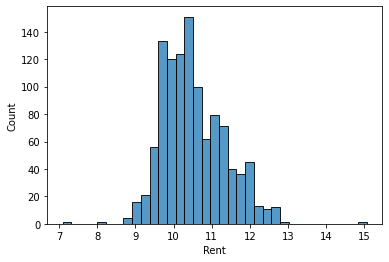

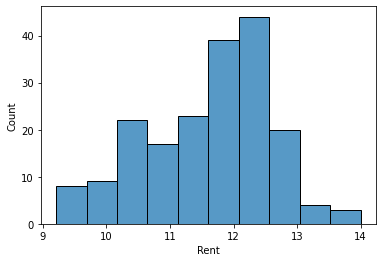

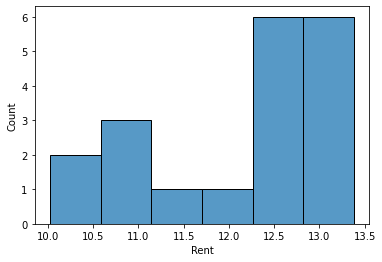

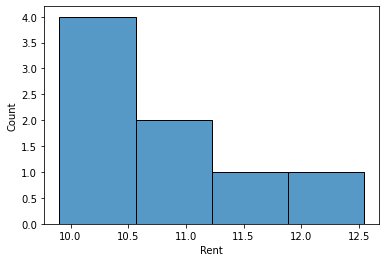

In [41]:
for i in range(6):
    sns.histplot(df[df['BHK']==i+1].Rent)
    plt.show()


In [42]:
### Each BHK contains a lot of Outliers.###

In [43]:
#Analyzing the Size column

#Unique values of Size
df['Size'].nunique()

615

<AxesSubplot:xlabel='Size', ylabel='Count'>

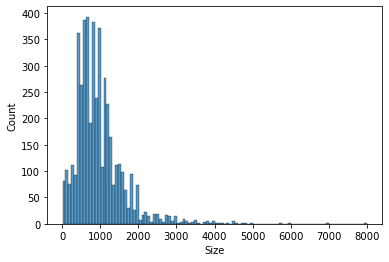

In [44]:
#Distribution of Size column
sns.histplot(df.Size)

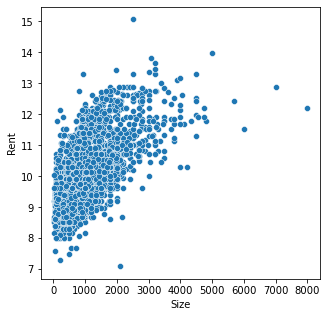

In [45]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df.Size,y=df.Rent)
plt.show()

C:\Users\CHETANA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Size'>

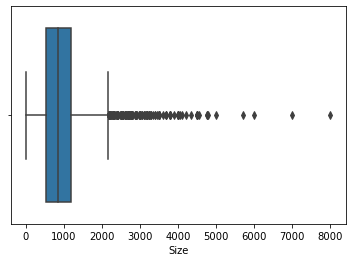

In [46]:
sns.boxplot('Size',data=df)

In [47]:
### More the Size of House,More the Rent is Contains a lot of Outliers.

In [48]:
#Analyzing the Floor Column
df.Floor.value_counts()

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: Floor, Length: 480, dtype: int64

In [49]:
#Analyzing the Area Type
df['Area Type'].value_counts()

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64

C:\Users\CHETANA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Area Type', ylabel='count'>

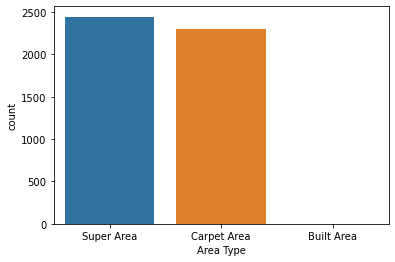

In [50]:
sns.countplot('Area Type',data=df)

In [51]:
### The no. of Super Area is higher than all of the areas.Built Area contains only two houses for Rent in the Dataset

In [52]:
df.groupby('Area Type')['Rent'].mean()

Area Type
Built Area      9.157777
Carpet Area    10.248720
Super Area      9.530714
Name: Rent, dtype: float64

C:\Users\CHETANA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Area Type', ylabel='Rent'>

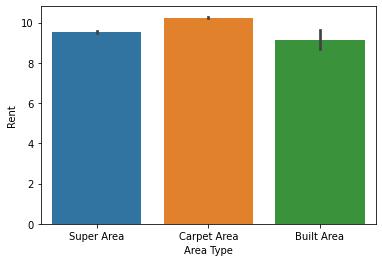

In [53]:
sns.barplot(df['Area Type'],y=df['Rent'])

In [54]:
### Built Area Houses are the Cheapest.Super Area Houses are cheaper as compared to Carpet Area.

In [55]:
#Analyzing the Area Locality
df['Area Locality'].value_counts()

Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: Area Locality, Length: 2235, dtype: int64

In [56]:
#Analyzing the City Column
df['City'].value_counts()

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

C:\Users\CHETANA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City', ylabel='count'>

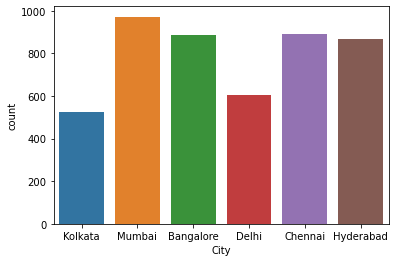

In [57]:
sns.countplot(df.City)

In [58]:
df.groupby('City')['Rent'].mean()

City
Bangalore     9.634777
Chennai       9.645544
Delhi         9.855434
Hyderabad     9.634704
Kolkata       9.150935
Mumbai       10.937095
Name: Rent, dtype: float64

In [59]:
### The Average Rent of Mumbai House is the Highest than all of the Cities.

C:\Users\CHETANA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City', ylabel='Rent'>

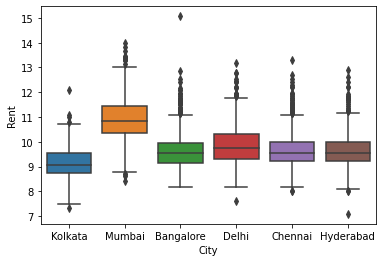

In [60]:
sns.boxplot('City','Rent',data=df)

In [61]:
#Analyzing the Furnishing Status
df['Furnishing Status'].value_counts()

Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: Furnishing Status, dtype: int64

In [62]:
###50% of the Houses are Semi Furnished.
###40% of the Houses are Unfurnished.
###Rest of the Houses are Furnished.

In [63]:
df.groupby('Furnishing Status')['Rent'].mean()

Furnishing Status
Furnished         10.352446
Semi-Furnished     9.979319
Unfurnished        9.575146
Name: Rent, dtype: float64

C:\Users\CHETANA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Furnishing Status', ylabel='Rent'>

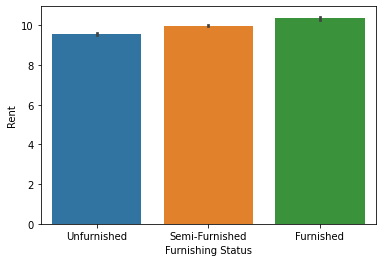

In [74]:
sns.barplot('Furnishing Status','Rent',data=df)

In [75]:
#Analyzing the Tenant Preferred
df['Tenant Preferred'].value_counts()

Bachelors/Family    3444
Bachelors            830
Family               472
Name: Tenant Preferred, dtype: int64

<AxesSubplot:xlabel='Tenant Preferred', ylabel='Rent'>

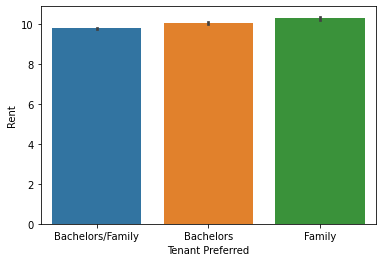

In [78]:
sns.barplot('Tenant Preferred','Rent',data=df)

In [79]:
#Analyzing the Bathroom Column
df['Bathroom'].value_counts()

2     2291
1     1474
3      749
4      156
5       60
6       12
7        3
10       1
Name: Bathroom, dtype: int64

C:\Users\CHETANA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bathroom', ylabel='count'>

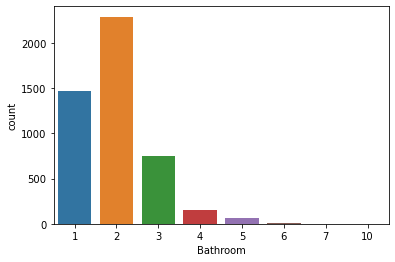

In [80]:
sns.countplot('Bathroom',data=df)

C:\Users\CHETANA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bathroom', ylabel='Rent'>

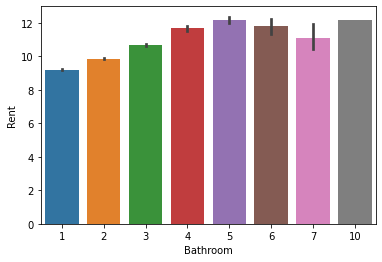

In [81]:
sns.barplot('Bathroom','Rent',data=df)

In [82]:
#Analyzing the Point of contact Column
df['Point of Contact'].value_counts()

Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: Point of Contact, dtype: int64

C:\Users\CHETANA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Point of Contact', ylabel='Rent'>

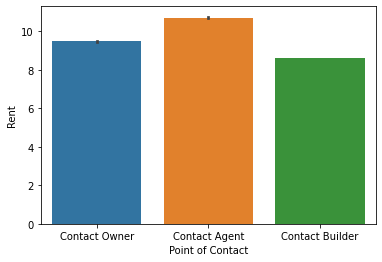

In [84]:
sns.barplot('Point of Contact','Rent',data=df)